In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


# Read and explore data

In [101]:
churn_df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [102]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
churn_df = churn_df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [104]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


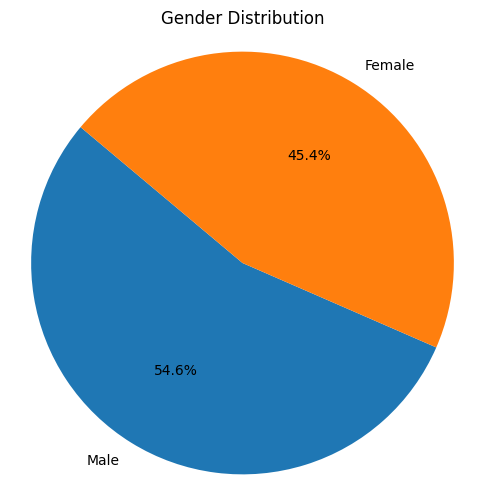

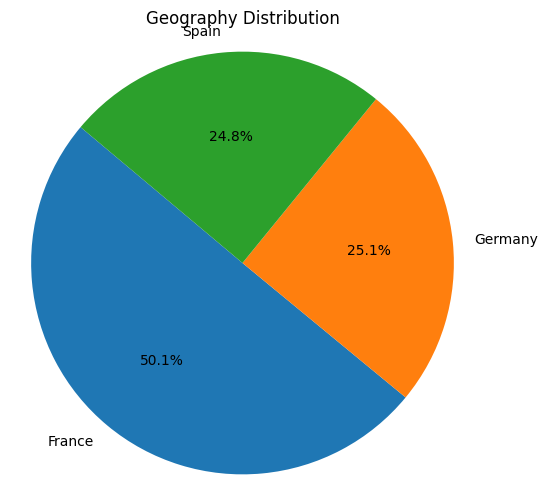

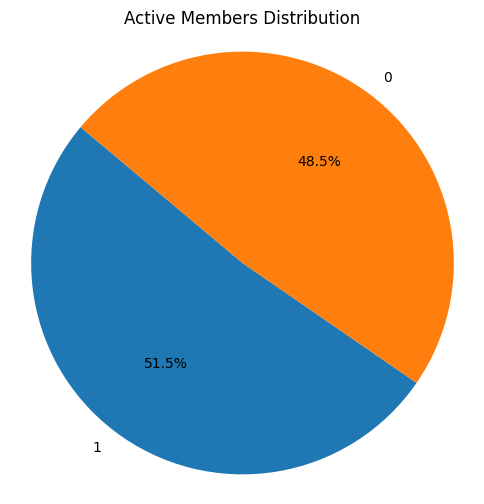

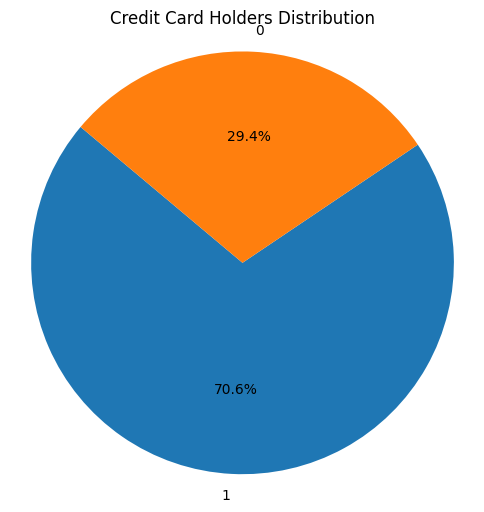

In [105]:
import matplotlib.pyplot as plt

def create_pie_chart(data, column, title):
    counts = data[column].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  
    plt.show()


create_pie_chart(churn_df, 'Gender', 'Gender Distribution')

create_pie_chart(churn_df, 'Geography', 'Geography Distribution')

create_pie_chart(churn_df, 'IsActiveMember', 'Active Members Distribution')

create_pie_chart(churn_df, 'HasCrCard', 'Credit Card Holders Distribution')

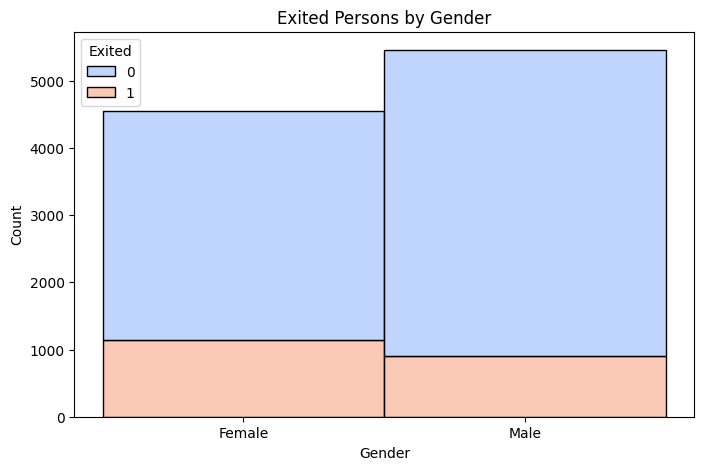

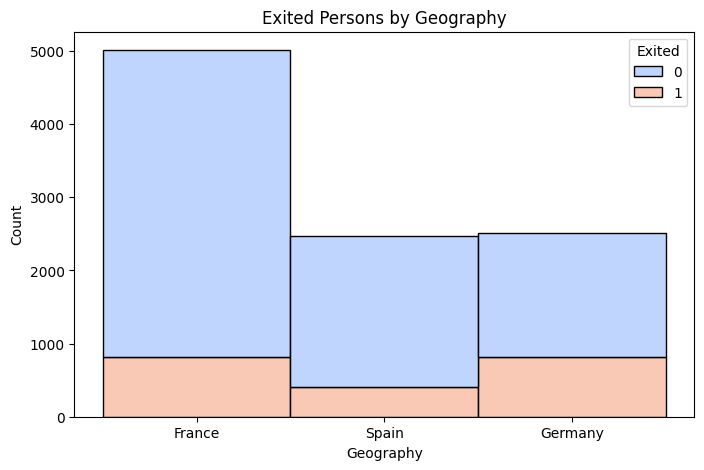

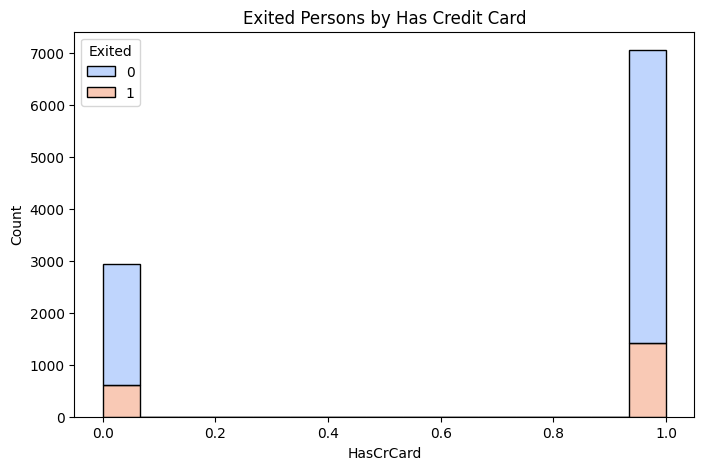

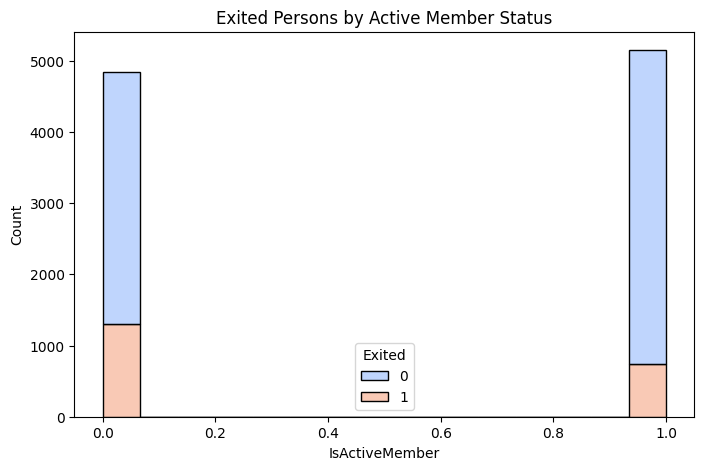

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_histogram(data, column, title):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=column, hue='Exited', multiple='stack', kde=False, palette='coolwarm')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

create_histogram(churn_df, 'Gender', 'Exited Persons by Gender')

create_histogram(churn_df, 'Geography', 'Exited Persons by Geography')

create_histogram(churn_df, 'HasCrCard', 'Exited Persons by Has Credit Card')

create_histogram(churn_df, 'IsActiveMember', 'Exited Persons by Active Member Status')


# Encode data

In [107]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
churn_df['Gender'] = label_encoder.fit_transform(churn_df['Gender'])
churn_df['Geography'] = label_encoder.fit_transform(churn_df['Geography'])

churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Corr matrix

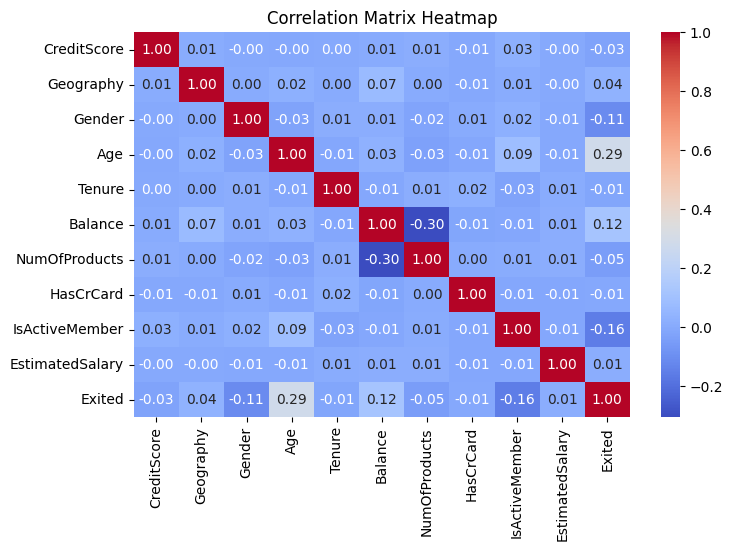

In [108]:
corr_matrix = churn_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [109]:
corr_matrix = churn_df.corr()
target_correlation = corr_matrix['Exited'].abs().sort_values(ascending=False)
top_features = target_correlation[target_correlation > 0.1].index.tolist()
top_features.remove('Exited')

# Print the top correlated features
print("Top correlated features with 'Exited':", top_features)


Top correlated features with 'Exited': ['Age', 'IsActiveMember', 'Balance', 'Gender']


In [110]:
corr_matrix = churn_df.corr()

target_correlation = corr_matrix['Exited'].abs().sort_values(ascending=True)
less_features = target_correlation[target_correlation < 0.02].index.tolist()


print("Less correlated features with 'Exited':", less_features)

Less correlated features with 'Exited': ['HasCrCard', 'EstimatedSalary', 'Tenure']


In [111]:
churn_df = churn_df.drop(columns = ['HasCrCard', 'EstimatedSalary', 'Tenure'])
churn_df.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,0,0,42,0.00,1,1,1
1,608,2,0,41,83807.86,1,1,0
2,502,0,0,42,159660.80,3,0,1
3,699,0,0,39,0.00,2,0,0
4,850,2,0,43,125510.82,1,1,0


# Train

In [112]:
from sklearn.model_selection import train_test_split

X = churn_df.drop('Exited', axis=1)
y = churn_df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,0,0,42,0.00,1,1
1,608,2,0,41,83807.86,1,1
2,502,0,0,42,159660.80,3,0
3,699,0,0,39,0.00,2,0
4,850,2,0,43,125510.82,1,1


In [113]:
X_train.shape

(8000, 7)

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Initialize the models
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=7)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)


# Evaluate the models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree F1 Score:", f1_dt)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest F1 Score:", f1_rf)

print("XGBoost Classifier Accuracy:", accuracy_xgb)
print("XGBoost Classifier Precision:", precision_xgb)
print("XGBoost Classifier F1 Score:", f1_xgb)

Decision Tree Accuracy: 0.857
Decision Tree Precision: 0.7442922374429224
Decision Tree F1 Score: 0.5326797385620915
Random Forest Accuracy: 0.86
Random Forest Precision: 0.7054545454545454
Random Forest F1 Score: 0.5808383233532936
XGBoost Classifier Accuracy: 0.8625
XGBoost Classifier Precision: 0.6993243243243243
XGBoost Classifier F1 Score: 0.6008708272859216


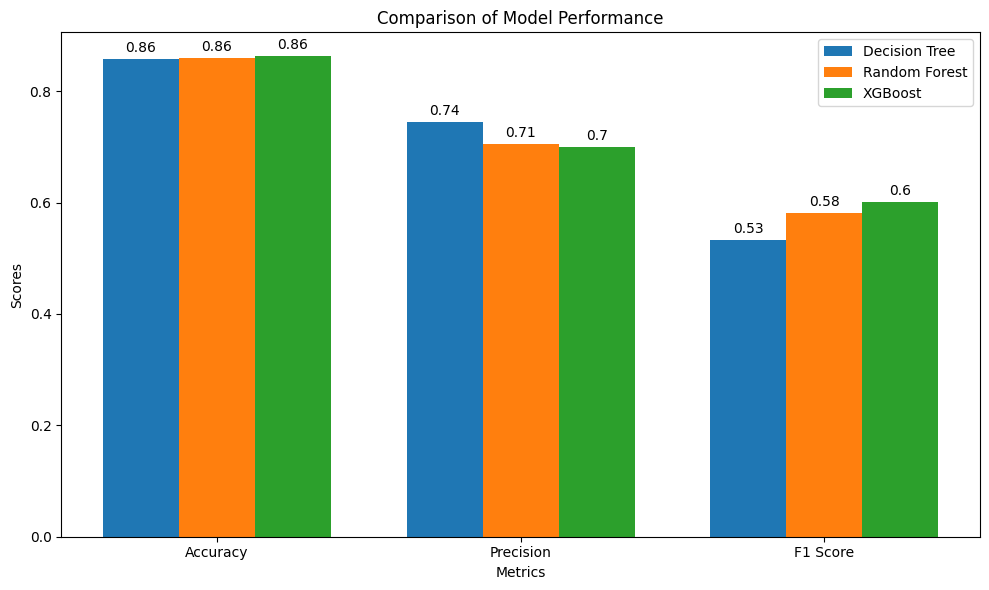

In [115]:
metrics = ['Accuracy', 'Precision', 'F1 Score']
dt_scores = [accuracy_dt, precision_dt, f1_dt]
rf_scores = [accuracy_rf, precision_rf, f1_rf]
xgb_scores = [accuracy_xgb, precision_xgb, f1_xgb]

x = np.arange(len(metrics))  
width = 0.25 

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, dt_scores, width, label='Decision Tree')
bars2 = ax.bar(x, rf_scores, width, label='Random Forest')
bars3 = ax.bar(x + width, xgb_scores, width, label='XGBoost')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

fig.tight_layout()
plt.show()
